In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [34]:
temp = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')
temp.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
0,1,100003,0,0,1,0,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,1,0,0,0,1
1,2,100004,0,1,0,1,1,67500.0,135000.0,6750.0,...,0,1,0,0,1,0,0,1,0,0
2,3,100007,0,0,0,0,1,121500.0,513000.0,21865.5,...,0,1,0,0,1,0,0,1,0,0
3,4,100008,0,0,0,0,1,99000.0,490495.5,27517.5,...,0,0,1,0,1,0,0,0,0,1
4,5,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,1,0,0,0,1,0,0,0,1


In [35]:
#Splitting inot train and test dataset
X = temp.iloc[:,3:]
y = temp['TARGET']
print(X.shape, y.shape)

(336226, 57) (336226,)


In [37]:
#Splitting into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(336226, 57) (235358, 57) (100868, 57) (336226,) (235358,) (100868,)


In [38]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [39]:
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.5803525399532061


In [40]:
report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.59      0.55     44555
           1       0.64      0.57      0.60     56313

    accuracy                           0.58    100868
   macro avg       0.58      0.58      0.58    100868
weighted avg       0.59      0.58      0.58    100868



/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


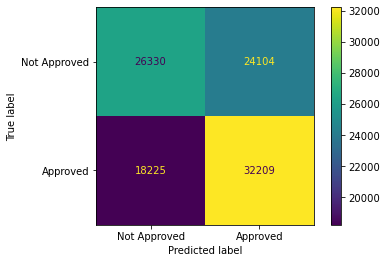

In [41]:
plot_confusion_matrix(model, X_test, y_test, values_format ='d', display_labels = ['Not Approved','Approved'])